# Regresion Simple con SciKit

Analizaremos la relacion entre el precio y el kilometraje de cualquier carro

In [189]:
import pandas as pd

In [190]:
df = pd.read_csv('car_data.csv')

In [191]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [192]:
car_data = df[["Kms_Driven","Selling_Price"]]

In [193]:
car_data.columns = ["km", "precio"]
car_data.head(20)

,km,precio
0,27000,3.35
1,43000,4.75
2,6900,7.25
3,5200,2.85
4,42450,4.60
5,2071,9.25
6,18796,6.75
7,33429,6.50
8,20273,8.75
9,42367,7.45


In [194]:
 from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(car_data.km.values.reshape(-1,1), car_data.precio.values, random_state=94)

In [196]:
X_test.shape ### Testing Data

(76, 1)

In [197]:
X_train.shape ### Training data

(225, 1)

In [198]:
from sklearn.linear_model import LinearRegression

In [199]:
linreg = LinearRegression() 

In [200]:
linreg.fit(X=X_train,y=y_train)

LinearRegression()

In [201]:
linreg.coef_

array([1.46070432e-05])

In [14]:
linreg.intercept_

3.821704239622739

In [15]:
prediccion = linreg.predict(X_test)

In [16]:
esperado = y_test

In [17]:
for p,e in zip(prediccion[::10],esperado[::10]): ### probamos el modelo
    print(f'Prediccion: {p:.2f}, Esperado:{e:.2f}')

Prediccion: 4.06, Esperado:6.00
Prediccion: 3.99, Esperado:3.10
Prediccion: 4.53, Esperado:4.65
Prediccion: 4.39, Esperado:0.38
Prediccion: 4.41, Esperado:4.00
Prediccion: 3.91, Esperado:1.05
Prediccion: 4.41, Esperado:6.25
Prediccion: 4.25, Esperado:9.15


In [204]:
lin_fun = (lambda x:linreg.coef_*x+linreg.intercept_)

In [210]:
for x in list(range(0,10000,1000)):
    print(f'El precio predecido para {x} kilometros es de {lin_fun(x)}')
##  relacion positiva lo que indica que tenemos carros con mucho km y precios altos en el dataset

El precio predecido para 0 kilometros es de [3.82170424]
El precio predecido para 1000 kilometros es de [3.83631128]
El precio predecido para 2000 kilometros es de [3.85091833]
El precio predecido para 3000 kilometros es de [3.86552537]
El precio predecido para 4000 kilometros es de [3.88013241]
El precio predecido para 5000 kilometros es de [3.89473946]
El precio predecido para 6000 kilometros es de [3.9093465]
El precio predecido para 7000 kilometros es de [3.92395354]
El precio predecido para 8000 kilometros es de [3.93856059]
El precio predecido para 9000 kilometros es de [3.95316763]


Visualizando la relación

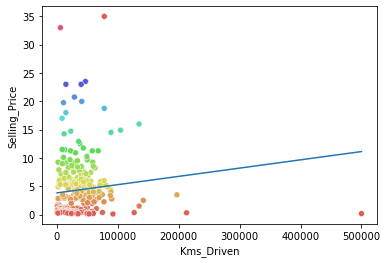

In [20]:
import seaborn as sns

axes = sns.scatterplot(data=df, x="Kms_Driven", y="Selling_Price", hue="Selling_Price", palette="hls", legend=False)
import numpy as np

x = np.array([min(df.Kms_Driven.values), max(df.Kms_Driven.values)])
y = lin_fun(x)

import matplotlib.pyplot as plt

line = plt.plot(x,y)

# Regresion Lineal Multiple con SciKit

Vamos a crear un modelo de prediccion para probar si se puede predecir el valor de un carro con año, kilometraje, y si es titulo limpio o no. Sin considerar el modelo. 

In [ ]:
## Cargando y limpiando los datos

In [72]:
car_data = pd.read_csv('car_data.csv')

In [73]:
car_data.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [74]:
car_data.drop(columns={'Unnamed: 0','condition', 'vin', 'lot'}, inplace=True)

In [75]:
categorica = ['brand', 'model', 'title_status', 'color', 'state', 'country']
car_data[categorica]

,brand,model,title_status,color,state,country
0,toyota,cruiser,clean vehicle,black,new jersey,usa
1,ford,se,clean vehicle,silver,tennessee,usa
2,dodge,mpv,clean vehicle,silver,georgia,usa
3,ford,door,clean vehicle,blue,virginia,usa
4,chevrolet,1500,clean vehicle,red,florida,usa
...,...,...,...,...,...,...
2494,nissan,versa,clean vehicle,red,california,usa
2495,nissan,versa,clean vehicle,silver,florida,usa
2496,nissan,versa,clean vehicle,silver,florida,usa
2497,nissan,versa,clean vehicle,black,florida,usa


In [76]:
car_clean = car_data.copy()

In [ ]:
### encoding para la variable categorica

In [86]:
car_encoded = pd.get_dummies(data=car_clean, columns=['title_status'])
car_encoded = car_encoded.drop(columns={'state', 'country', 'color'})
car_encoded = car_encoded.drop(columns={'brand', 'model'})

In [87]:
pd.set_option("display.width",None)
car_encoded.head()

,price,year,mileage,title_status_clean vehicle,title_status_salvage insurance
0,6300,2008,274117.0,1,0
1,2899,2011,190552.0,1,0
2,5350,2018,39590.0,1,0
3,25000,2014,64146.0,1,0
4,27700,2018,6654.0,1,0


In [88]:
muestra = car_encoded.sample(frac=0.1, random_state=94)
muestra

,price,year,mileage,title_status_clean vehicle,title_status_salvage insurance
323,0,1997,203297.0,0,1
2262,15200,2018,12129.0,1,0
910,26500,2019,28551.0,1,0
880,10295,2014,105962.0,1,0
1148,17700,2016,22863.0,1,0
...,...,...,...,...,...
2284,600,2012,206142.0,0,1
1026,24300,2019,34922.0,1,0
2369,16000,2018,44732.0,1,0
796,9200,2017,32856.0,1,0


In [89]:
features = car_encoded.iloc[:, 1:]
label = car_encoded['price'] ## preparando datos para el modelo

In [90]:
features.shape

(2499, 4)

In [91]:
label.shape

(2499,)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=17)

In [93]:
linreg.fit(X=X_train, y=y_train) ### haciendo el modelo

LinearRegression()

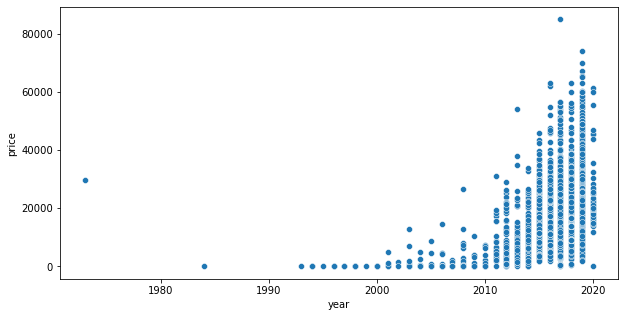

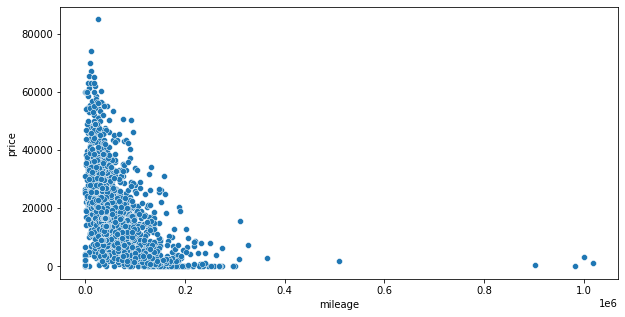

In [95]:
for feature in ('year','mileage'):
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=car_encoded, x=feature, y=label, palette="hls", legend=False) ## analizando relaciones

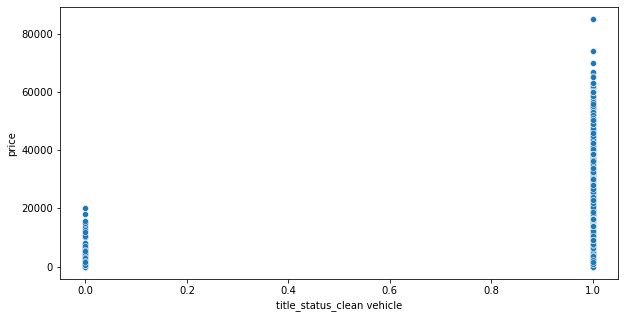

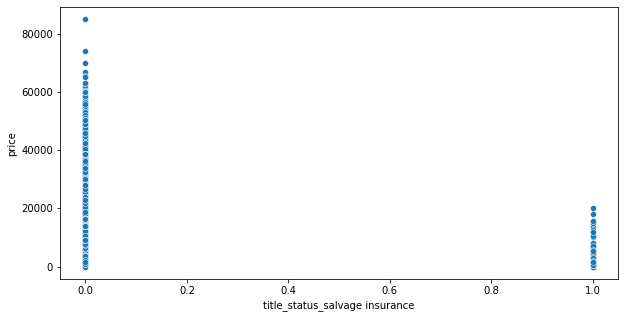

In [96]:
for feature in ('title_status_clean vehicle', 'title_status_salvage insurance'):
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=car_encoded, x=feature, y=label, palette="warm", legend=False)

In [147]:
marcas = features.columns.values[2:10]
for column in marcas:
    if column.startswith("brand_",0,6):
        plt.figure(figsize=(7,3))
        sns.boxplot(data=car_encoded, x=column, y=label, palette="warm", legend=False)

In [153]:
car_name = pd.read_csv('car_data.csv')

In [164]:
car_name = car_name[['Car_Name', 'Selling_Price']]

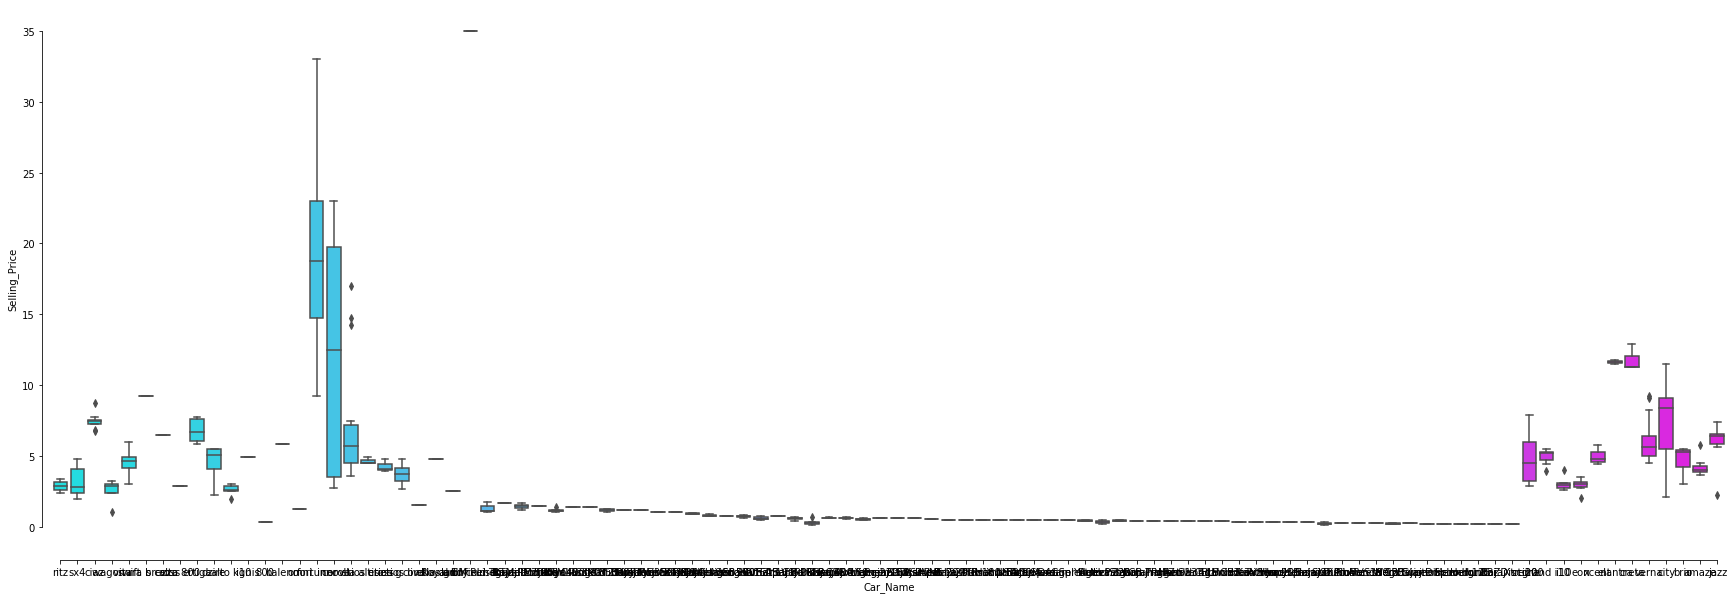

In [184]:
plt.figure(figsize=(30,10))
sns.boxplot(x=car_name['Car_Name'], y=car_name['Selling_Price'], data=car_name, palette='cool')
sns.despine(offset=10, trim=True)
### dispersion de precios de los distintos modelos (no incluiremos en el modelo)

In [228]:
car_data = car_encoded[['year','mileage','title_status_clean vehicle']]
label

0        6300
1        2899
2        5350
3       25000
4       27700
        ...  
2494     7800
2495     9200
2496     9200
2497     9200
2498     9200
Name: price, Length: 2499, dtype: int64

In [100]:
car_data = car_encoded[['year','mileage','title_status_clean vehicle']]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(car_data, label, random_state=17)

In [102]:
X_train.shape

(1874, 3)

In [103]:
y_train.shape

(1874,)

In [104]:
print(X_test.shape)
print(y_test.shape)

(625, 3)
(625,)


In [105]:
linreg = LinearRegression()

In [106]:
linreg.fit(X=X_train,y=y_train)

LinearRegression()

In [108]:
for i, feature in enumerate(car_data.columns):
    print(f'{feature:>10}: {linreg.coef_[i]}') ### analizamos los coeficientes

      year: 745.287638765774
   mileage: -0.042506832528444394
title_status_clean vehicle: 7199.842439983353


In [186]:
print(f' El intercept del modelo es de {linreg.intercept_}')

 El intercept del modelo es de -1488714.9458958898


In [185]:
for i, feature in enumerate(car_data.columns):
    print(f'El coeficiente de {feature} de de {linreg.coef_[i]}') 

El coeficiente de year de de 745.287638765774
El coeficiente de mileage de de -0.042506832528444394
El coeficiente de title_status_clean vehicle de de 7199.842439983353


In [125]:
esperados = y_test
esperados[:5]

2442    28100
2366    20100
1606    45500
1090     2700
154      4040
Name: price, dtype: int64

In [131]:
prediccion = linreg.predict(X_test)
prediccion[:5]

array([22097.50833908, 21838.3595252 , 18909.05548708, 17385.877469  ,
       20317.49222012])

In [132]:
df = pd.DataFrame()

In [133]:
df["Esperados"] = pd.Series(esperados)
df["Prediccion"] = pd.Series(prediccion)

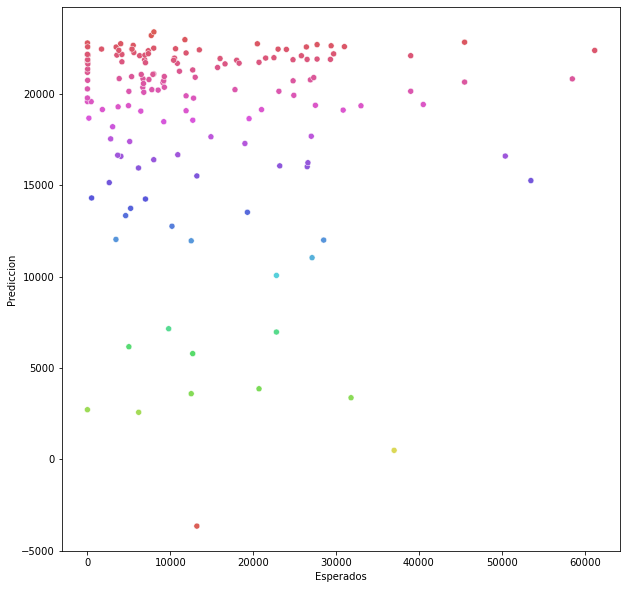

In [142]:
import matplotlib.pyplot as plt
figura = plt.figure(figsize=(10,10))
axis = sns.scatterplot(data = df, x="Esperados", y="Prediccion", hue="Prediccion", palette='hls', legend=False)

In [143]:
from sklearn import metrics

In [144]:
metrics.r2_score(esperados, prediccion)

0.23754134563240203

In [ ]:
### notas: quitar outliers de carros muy costos y
###quitar modelos con muchos años y km y altos precios para mejorar el modelo

In [145]:
metrics.mean_squared_error(esperados, prediccion) ## extraordinariamente alto

108715707.03395075